In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [3]:
print(len(train_data))
print(len(test_data))

8982
2246


In [5]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [6]:
# Пример декодирования отзыва по словарю
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)

565248/550378 [==============================] - 0s 0us/step


In [7]:
decoded_review

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## Подготовка данных

In [8]:
# Кодирование последовательностей целых чисел в бинарную матрицу
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [37]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

## Конструирование сети

In [19]:
from keras import models
from keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [20]:
optimizer = optimizers.Adam

In [21]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# Выделим из обучающей выборки валидационную для контроля обучения
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [23]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_val, y_val))

Epoch 1/20
125/125 [==============================] - 1s 7ms/step - loss: 1.8626 - accuracy: 0.6238 - val_loss: 1.1726 - val_accuracy: 0.7460
Epoch 2/20
125/125 [==============================] - 1s 5ms/step - loss: 0.8313 - accuracy: 0.8188 - val_loss: 0.9363 - val_accuracy: 0.7980
Epoch 3/20
125/125 [==============================] - 1s 5ms/step - loss: 0.4674 - accuracy: 0.8991 - val_loss: 0.9132 - val_accuracy: 0.8040
Epoch 4/20
125/125 [==============================] - 1s 5ms/step - loss: 0.2929 - accuracy: 0.9352 - val_loss: 0.9128 - val_accuracy: 0.8080
Epoch 5/20
125/125 [==============================] - 1s 5ms/step - loss: 0.2227 - accuracy: 0.9478 - val_loss: 0.9179 - val_accuracy: 0.8120
Epoch 6/20
125/125 [==============================] - 1s 5ms/step - loss: 0.1849 - accuracy: 0.9536 - val_loss: 1.0249 - val_accuracy: 0.7840
Epoch 7/20
125/125 [==============================] - 1s 5ms/step - loss: 0.1660 - accuracy: 0.9546 - val_loss: 1.0625 - val_accuracy: 0.7890
Epoch 

## Визуализация графиков потерь и точности

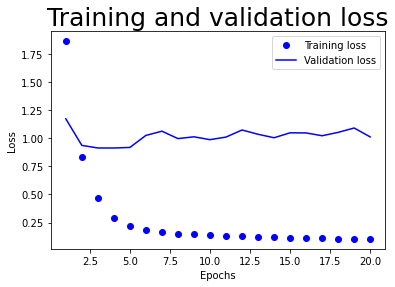

In [24]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', fontsize = 25)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

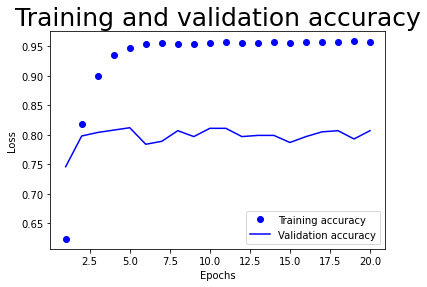

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy', fontsize = 25)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
optimizer = optimizers.Adam

In [27]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=64,
                    validation_data=(x_val, y_val))

Epoch 1/9
125/125 [==============================] - 1s 7ms/step - loss: 1.8736 - accuracy: 0.5931 - val_loss: 1.1755 - val_accuracy: 0.7410
Epoch 2/9
125/125 [==============================] - 1s 5ms/step - loss: 0.8653 - accuracy: 0.8093 - val_loss: 0.9260 - val_accuracy: 0.8100
Epoch 3/9
125/125 [==============================] - 1s 5ms/step - loss: 0.4818 - accuracy: 0.8949 - val_loss: 0.8476 - val_accuracy: 0.8190
Epoch 4/9
125/125 [==============================] - 1s 5ms/step - loss: 0.2902 - accuracy: 0.9395 - val_loss: 0.9075 - val_accuracy: 0.8200
Epoch 5/9
125/125 [==============================] - 1s 5ms/step - loss: 0.2220 - accuracy: 0.9473 - val_loss: 0.9207 - val_accuracy: 0.8140
Epoch 6/9
125/125 [==============================] - 1s 5ms/step - loss: 0.1860 - accuracy: 0.9520 - val_loss: 0.9288 - val_accuracy: 0.8030
Epoch 7/9
125/125 [==============================] - 1s 5ms/step - loss: 0.1618 - accuracy: 0.9549 - val_loss: 0.9399 - val_accuracy: 0.8180
Epoch 8/9
125

In [29]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.0805 - accuracy: 0.7890


In [30]:
predictions = model.predict(x_test)

In [31]:
print(predictions[0])

[3.19009729e-07 3.51080303e-06 2.04469313e-08 9.26971495e-01
 7.23853633e-02 6.50672831e-08 8.54142357e-08 1.82982873e-07
 8.44126553e-05 9.21893673e-08 8.23185076e-08 2.72528443e-04
 5.84588349e-07 1.16262545e-05 1.43877571e-07 6.30999586e-10
 3.06848997e-05 2.35380888e-08 1.64571475e-07 3.17420490e-05
 4.01238358e-05 8.67859271e-05 7.52788720e-10 5.91714252e-06
 1.02176996e-10 5.91017457e-09 1.30570896e-08 5.56449891e-07
 9.66604503e-08 2.42000406e-05 3.42010972e-05 4.48828501e-07
 2.91178083e-07 2.41555487e-08 2.41202156e-06 2.22007781e-08
 5.94227913e-06 1.56200191e-08 7.76509637e-07 1.14857801e-06
 1.39296887e-07 3.46662296e-06 2.22821129e-07 9.94814258e-08
 8.14519979e-12 6.06134920e-09]


In [32]:
predictions[0].shape

(46,)

In [33]:
np.sum(predictions[0])

1.0

In [34]:
np.argmax(predictions[0])

3

## 3.5.6. Другой способ обработки меток и потерь
Выше упоминалось, что метки также можно было бы преобразовать в тензор целых
чисел, как показано ниже:

Единственное, что изменилось в данном случае, — функция потерь. В листинге 3.21
использовалась функция потерь categorical_crossentropy, предполагающая, что
метки получены методом кодирования категорий. С целочисленными метками
следует использовать функцию sparse_categorical_crossentropy:

In [35]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [36]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Эксперименты с сетью

## 128 нейронов

In [38]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [39]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_val, y_val))

Epoch 1/20
125/125 [==============================] - 2s 9ms/step - loss: 1.5730 - accuracy: 0.6678 - val_loss: 0.9981 - val_accuracy: 0.7830
Epoch 2/20
125/125 [==============================] - 1s 6ms/step - loss: 0.6270 - accuracy: 0.8614 - val_loss: 0.8136 - val_accuracy: 0.8340
Epoch 3/20
125/125 [==============================] - 1s 6ms/step - loss: 0.3232 - accuracy: 0.9320 - val_loss: 0.8629 - val_accuracy: 0.8250
Epoch 4/20
125/125 [==============================] - 1s 5ms/step - loss: 0.2303 - accuracy: 0.9451 - val_loss: 0.8385 - val_accuracy: 0.8260
Epoch 5/20
125/125 [==============================] - 1s 6ms/step - loss: 0.1762 - accuracy: 0.9526 - val_loss: 0.8423 - val_accuracy: 0.8200
Epoch 6/20
125/125 [==============================] - 1s 6ms/step - loss: 0.1563 - accuracy: 0.9534 - val_loss: 0.9031 - val_accuracy: 0.8110
Epoch 7/20
125/125 [==============================] - 1s 6ms/step - loss: 0.1401 - accuracy: 0.9545 - val_loss: 0.9097 - val_accuracy: 0.8150
Epoch 

In [41]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 4ms/step - loss: 1.1345 - accuracy: 0.7943


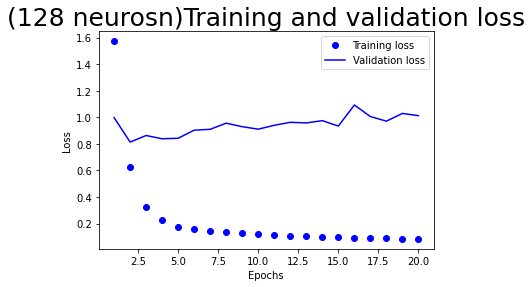

In [42]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('(128 neurosn)Training and validation loss', fontsize = 25)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

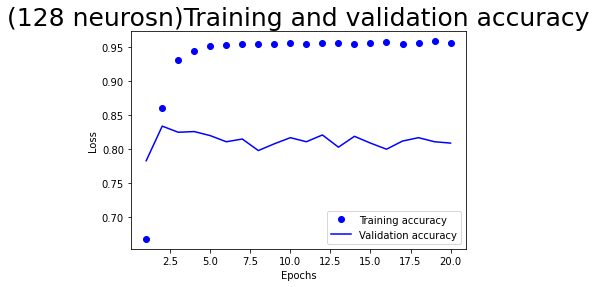

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('(128 neurosn)Training and validation accuracy', fontsize = 25)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 32 нейронa

In [45]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [46]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_val, y_val))

Epoch 1/20
125/125 [==============================] - 1s 7ms/step - loss: 2.1910 - accuracy: 0.5512 - val_loss: 1.3785 - val_accuracy: 0.6950
Epoch 2/20
125/125 [==============================] - 1s 5ms/step - loss: 1.1310 - accuracy: 0.7489 - val_loss: 1.0887 - val_accuracy: 0.7650
Epoch 3/20
125/125 [==============================] - 1s 5ms/step - loss: 0.7456 - accuracy: 0.8349 - val_loss: 0.9614 - val_accuracy: 0.7940
Epoch 4/20
125/125 [==============================] - 1s 5ms/step - loss: 0.4956 - accuracy: 0.8939 - val_loss: 0.9432 - val_accuracy: 0.7940
Epoch 5/20
125/125 [==============================] - 1s 5ms/step - loss: 0.3431 - accuracy: 0.9253 - val_loss: 0.9246 - val_accuracy: 0.8050
Epoch 6/20
125/125 [==============================] - 1s 5ms/step - loss: 0.2595 - accuracy: 0.9414 - val_loss: 0.9493 - val_accuracy: 0.8130
Epoch 7/20
125/125 [==============================] - 1s 5ms/step - loss: 0.2140 - accuracy: 0.9489 - val_loss: 0.9924 - val_accuracy: 0.7970
Epoch 

In [48]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 4ms/step - loss: 1.2007 - accuracy: 0.7903


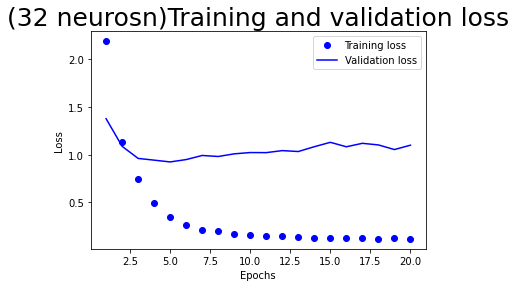

In [49]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('(32 neurosn)Training and validation loss', fontsize = 25)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

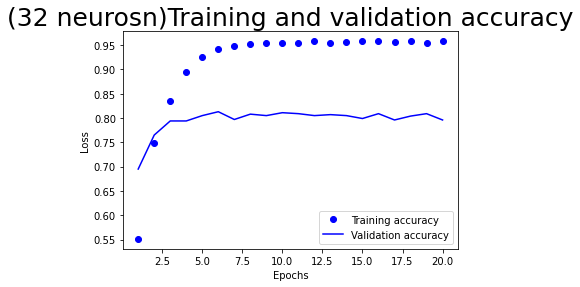

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('(32 neurosn)Training and validation accuracy', fontsize = 25)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 1 слой

In [52]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

In [53]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_val, y_val))

Epoch 1/20
125/125 [==============================] - 1s 6ms/step - loss: 1.7931 - accuracy: 0.6493 - val_loss: 1.1151 - val_accuracy: 0.7560
Epoch 2/20
125/125 [==============================] - 1s 5ms/step - loss: 0.7989 - accuracy: 0.8353 - val_loss: 0.8897 - val_accuracy: 0.8160
Epoch 3/20
125/125 [==============================] - 1s 5ms/step - loss: 0.4767 - accuracy: 0.9013 - val_loss: 0.8069 - val_accuracy: 0.8310
Epoch 4/20
125/125 [==============================] - 1s 5ms/step - loss: 0.3121 - accuracy: 0.9337 - val_loss: 0.7842 - val_accuracy: 0.8310
Epoch 5/20
125/125 [==============================] - 1s 5ms/step - loss: 0.2349 - accuracy: 0.9461 - val_loss: 0.8003 - val_accuracy: 0.8240
Epoch 6/20
125/125 [==============================] - 1s 5ms/step - loss: 0.1899 - accuracy: 0.9521 - val_loss: 0.8289 - val_accuracy: 0.8280
Epoch 7/20
125/125 [==============================] - 1s 5ms/step - loss: 0.1775 - accuracy: 0.9528 - val_loss: 0.8371 - val_accuracy: 0.8220
Epoch 

In [55]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 4ms/step - loss: 1.1315 - accuracy: 0.7912


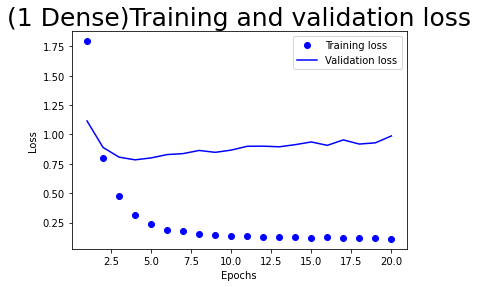

In [56]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('(1 Dense)Training and validation loss', fontsize = 25)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

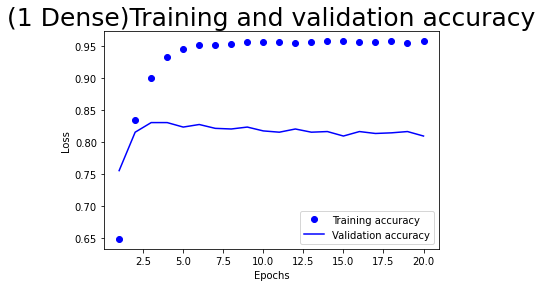

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('(1 Dense)Training and validation accuracy', fontsize = 25)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 3 слоя

In [58]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [59]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [60]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_val, y_val))

Epoch 1/20
125/125 [==============================] - 1s 8ms/step - loss: 1.9129 - accuracy: 0.6082 - val_loss: 1.1822 - val_accuracy: 0.7270
Epoch 2/20
125/125 [==============================] - 1s 5ms/step - loss: 0.8861 - accuracy: 0.7938 - val_loss: 0.9882 - val_accuracy: 0.7850
Epoch 3/20
125/125 [==============================] - 1s 5ms/step - loss: 0.5030 - accuracy: 0.8876 - val_loss: 0.9301 - val_accuracy: 0.8140
Epoch 4/20
125/125 [==============================] - 1s 6ms/step - loss: 0.3072 - accuracy: 0.9303 - val_loss: 0.9739 - val_accuracy: 0.8030
Epoch 5/20
125/125 [==============================] - 1s 5ms/step - loss: 0.2272 - accuracy: 0.9476 - val_loss: 0.9891 - val_accuracy: 0.8080
Epoch 6/20
125/125 [==============================] - 1s 5ms/step - loss: 0.1872 - accuracy: 0.9515 - val_loss: 1.0034 - val_accuracy: 0.8100
Epoch 7/20
125/125 [==============================] - 1s 5ms/step - loss: 0.1566 - accuracy: 0.9534 - val_loss: 1.0250 - val_accuracy: 0.8050
Epoch 

In [61]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 4ms/step - loss: 1.3343 - accuracy: 0.7801


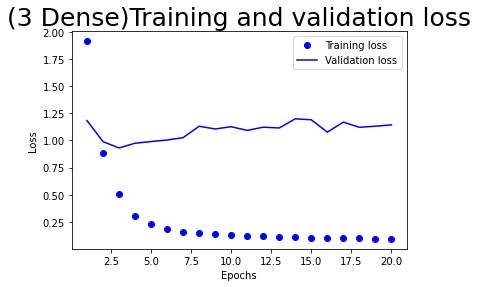

In [62]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('(3 Dense)Training and validation loss', fontsize = 25)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

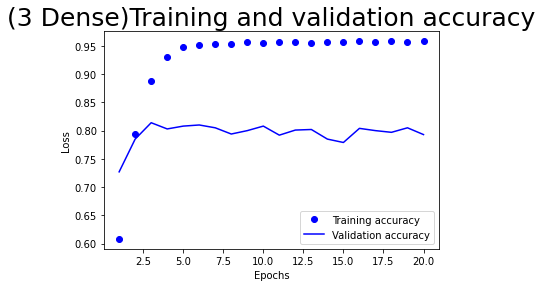

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('(3 Dense)Training and validation accuracy', fontsize = 25)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()